In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

iris = load_iris()
X = iris.data 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Rozmiar zbioru treningowego: {X_train.shape[0]}")
print(f"Rozmiar zbioru testowego: {X_test.shape[0]}")

Rozmiar zbioru treningowego: 105
Rozmiar zbioru testowego: 45


In [2]:
# Inicjalizacja klasyfikatorów
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_11 = KNeighborsClassifier(n_neighbors=11)
nb = GaussianNB()  # Naive Bayes

In [3]:
results = {}

# Funkcja do trenowania i ewaluacji klasyfikatora
def evaluate_classifier(clf, name):
    # Trenowanie modelu
    clf.fit(X_train, y_train)
    
    # Predykcja na zbiorze testowym
    y_pred = clf.predict(X_test)
    
    # Obliczanie dokładności
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }
    
    # Wyświetlanie wyników
    print(f"{name} - Dokładność: {accuracy * 100:.2f}%")
    return y_pred

In [4]:
# Uruchomienie klasyfikatorów
evaluate_classifier(knn_3, "k-NN (k=3)")
evaluate_classifier(knn_5, "k-NN (k=5)")
evaluate_classifier(knn_11, "k-NN (k=11)")
evaluate_classifier(nb, "Naive Bayes")

k-NN (k=3) - Dokładność: 100.00%
k-NN (k=5) - Dokładność: 100.00%
k-NN (k=11) - Dokładność: 100.00%
Naive Bayes - Dokładność: 97.78%


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

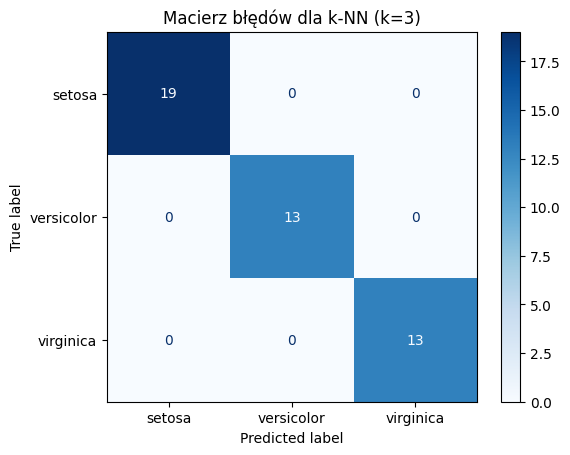

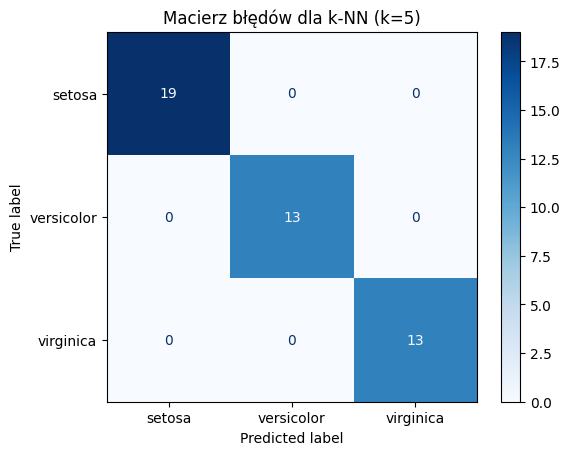

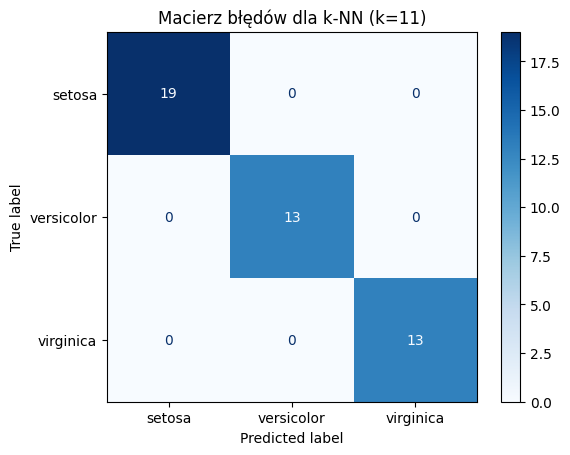

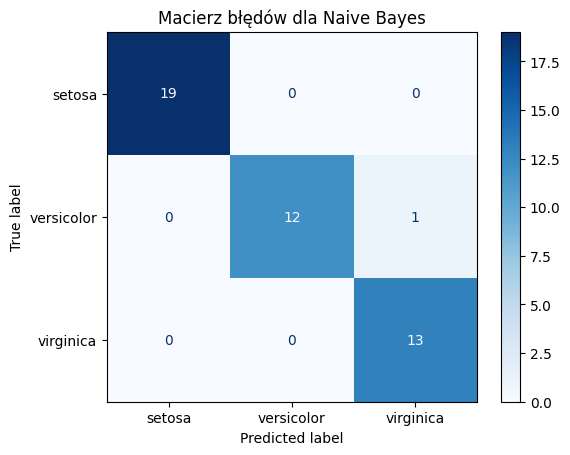

In [5]:
# Funkcja do wyświetlania macierzy błędów
def display_confusion_matrix(conf_matrix, name):
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Macierz błędów dla {name}")
    plt.show()

# Wyświetlanie macierzy błędów dla każdego klasyfikatora
for name, result in results.items():
    display_confusion_matrix(result["confusion_matrix"], name)

In [6]:
# Porównanie dokładności
accuracies = {name: result["accuracy"] for name, result in results.items()}
print("\nPorównanie dokładności klasyfikatorów:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy * 100:.2f}%")

# Najlepszy klasyfikator
best_classifier = max(accuracies, key=accuracies.get)
print(f"\nNajlepszy klasyfikator: {best_classifier} ({accuracies[best_classifier] * 100:.2f}%)")



Porównanie dokładności klasyfikatorów:
k-NN (k=3): 100.00%
k-NN (k=5): 100.00%
k-NN (k=11): 100.00%
Naive Bayes: 97.78%

Najlepszy klasyfikator: k-NN (k=3) (100.00%)
